In [515]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import matplotlib
%matplotlib notebook

# SEIR
![](SEIR.png)

In [522]:
N0 = 1E+7 # Initial population
E0 = 1E+5 # Initial exposed

R0 = 2.64
ILLNESS_DURATION = 7
NONINFECTIOUS_DURATION = 3

<IPython.core.display.Javascript object>


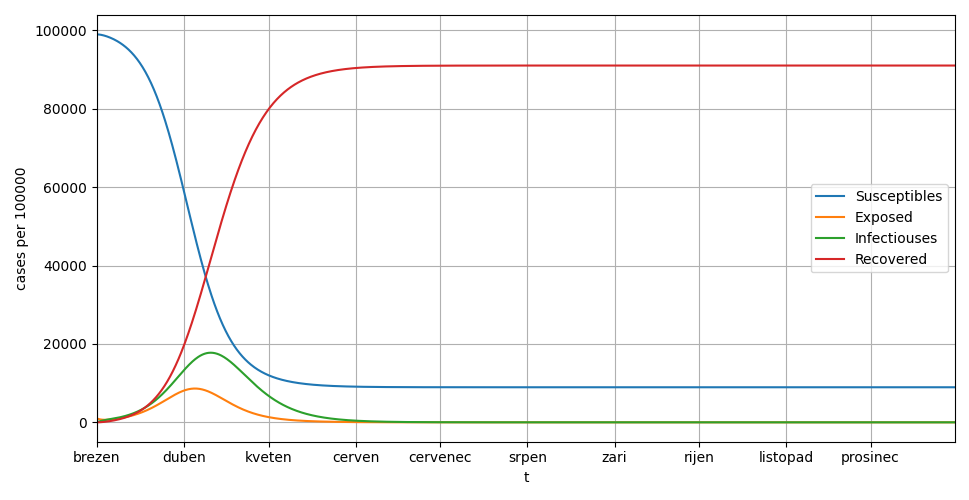

In [523]:
def run(R0):
    def SEIR(y, t, alpha, beta, gamma):
        """
        :param beta Infection rate
        :param gamma Recovery rate
        """    
        S, E, I, R = y
        N = S + E + I + R
        dSdt = - beta * I * S / N
        dEdt = beta * I * S / N - alpha * E
        dIdt = alpha * E - gamma * I
        dRdt = gamma * I

        return [dSdt, dEdt, dIdt, dRdt]


    alpha = 1 / NONINFECTIOUS_DURATION 
    beta = R0 / ILLNESS_DURATION # Infection rate
    gamma = 1 / ILLNESS_DURATION # Recovery rate


    N  = N0 # Population
    E = E0 # Exposed
    I = 0 # Infectiouses
    S = N0 - E0 # Susceptibles
    R = 0 # Recovered

    t = np.arange(60, 3*365, 0.25)

    return t, odeint(SEIR, [S, E, I, R], t, args=(alpha, beta, gamma))

t, sol = run(R0=2.64)

plt.figure(figsize=(9.7,5))
plt.plot(t, 100000*sol[:, 0]/N, label='Susceptibles')
plt.plot(t, 100000*sol[:, 1]/N, label='Exposed')
plt.plot(t, 100000*sol[:, 2]/N, label='Infectiouses')
plt.plot(t, 100000*sol[:, 3]/N, label='Recovered')
plt.xticks(
    np.cumsum([0,31,29,31,30,31,30,31,31,30,31,30,31,31,28,31,30,31,30,31,31,30,31,30,31]),
    ['leden','unor','brezen','duben','kveten','cerven','cervenec','srpen','zari','rijen','listopad','prosinec', 
     'leden','unor','brezen','duben','kveten','cerven','cervenec','srpen','zari','rijen','listopad','prosinec'],    
)
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('cases per 100000')
plt.xlim(31+29,365)
plt.grid()
plt.tight_layout()

<IPython.core.display.Javascript object>


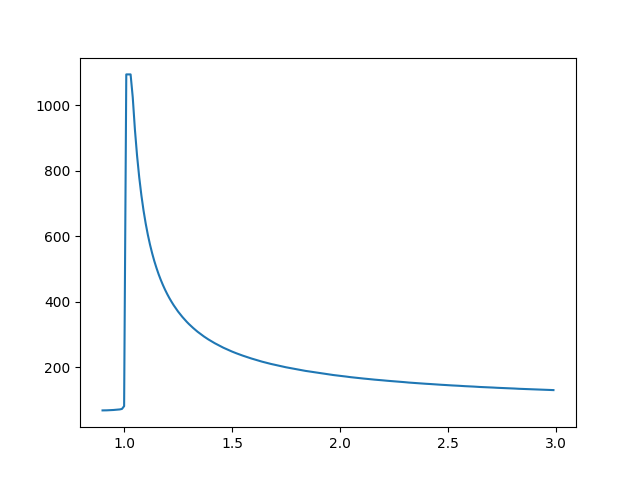

In [518]:
RS = np.arange(0.9, 3, 0.01)
peaks = []
for R0 in RS:
    t, sol = run(R0=R0)
    peaks.append(t[np.argmax(sol[:, 2])])

plt.figure()
plt.plot(RS, peaks)